# Project Introduction

<font color='green'>Welcome to my project on Binary Classification of Machine Failures as my first attempt to a kaggle competition. In this notebook, I will explore and analyze the dataset to solve the binary calssification problem whether a machine will fail or not</font>

## Dataset Description

<font color='green'>The project is based on a dataset that is synthetically generated from real-world data.<br>
It contains<br> 
train.csv - the training dataset; Machine failure is the (binary) target (which, in order to align with the ordering of the original dataset, is not in the last column position)
<br>test.csv - the test dataset; your objective is to predict the probability of Machine failure
</font>
## Methodology

<font color='green'>To achieve the project goals, I will follow the following steps:<br>

<font color='green'>1. Exploratory data analysis<br>
2. Data preprocessing and cleaning <br>
3. Building and evaluating machine learning models<br>
4. Results and conclusion
</font></font>
    
## Tools and Libraries Used

<font color='green'>For this project, I will be using Python and Sklearn to build the model. The primary tools and libraries used in this notebook include:

<font color='green'>-Python<br>
-Sklearn<br>
-Pandas<br>
-Seaborn<br>
<font color='green'>Now let's dive into the project and explore the data!<br>
<font color='blue'>Going forward in the note book all description or pre-requisite for a cell will be in Blue Color.<br>
<font color='red'>All inferences derived will be in Red Color.



## Exploratory Data Analysis
<font color='blue'>So Let's dive straight into importing the basic required libraries, reading our data and having a look at it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [5]:
df.shape

(136429, 14)

In [6]:
df_test.shape

(90954, 13)

<font color='red'>Off the bat we can see that we have around 130k rows and 14 columns to work with out of which one is our target column, one is an id column and others are our independant features<br>
<font color='blue'>Lets futher use some summary functions to understand our data and its uniqueness

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [8]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.describe(include=['O'])

,Product ID,Type
count,136429,136429
unique,9976,3
top,L53257,L
freq,139,95354


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [11]:
df_test.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [12]:
df_test.describe(include=['O'])

,Product ID,Type
count,90954,90954
unique,9909,3
top,L56257,L
freq,98,63438


<font color='red'>Two columns are Type Object Product ID and Type, Not all values in Product ID are unique hence we do not drop it.<br>Few amount of columns have min value as 0 which can be a problem.<br>We know out target column Machine Failure is a binary class and is given as 0 and 1. Other columns such as [TWF	HDF	PWF	OSF	RNF]need to be checked if they are actually zero values or is the feature representing a category and is already encoded.<br><font color='blue'>We can see that column id is a unique identifier and has no value to our model hence we will start by dropping it and further checking those minimum 0 columns

In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
df_test.drop('id',axis=1,inplace=True)

In [15]:
print('Number of Unique Values',df['TWF'].nunique())
print(df['TWF'].value_counts())

Number of Unique Values 2
0    136217
1       212
Name: TWF, dtype: int64


In [16]:
print('Number of Unique Values',df['HDF'].nunique())
print(df['HDF'].value_counts())

Number of Unique Values 2
0    135725
1       704
Name: HDF, dtype: int64


In [17]:
print('Number of Unique Values',df['PWF'].nunique())
print(df['PWF'].value_counts())

Number of Unique Values 2
0    136102
1       327
Name: PWF, dtype: int64


In [18]:
print('Number of Unique Values',df['OSF'].nunique())
print(df['OSF'].value_counts())

Number of Unique Values 2
0    135889
1       540
Name: OSF, dtype: int64


In [19]:
print('Number of Unique Values',df['RNF'].nunique())
print(df['RNF'].value_counts())

Number of Unique Values 2
0    136121
1       308
Name: RNF, dtype: int64


<font color='red'>Kudos its exactly how we predicted these features are actually categorical but they are already transformed into 0 and 1.Another way to quickly identify is to check quartile values in describe function, u can scroll up and see they are zero for all these columns.<br><font color='blue'>Great, Lets Move forward by doing some Univariate Analysis.

## Univariate Analysis

In [20]:
print('Number of Unique Values in Column',df['Machine failure'].unique())

Number of Unique Values in Column [0 1]


In [21]:
print('Distribution of values in data',df['Machine failure'].value_counts())

Distribution of values in data 0    134281
1      2148
Name: Machine failure, dtype: int64


In [22]:
print('Distribution of values in data by percentage',df['Machine failure'].value_counts()/len(df)*100)

Distribution of values in data by percentage 0    98.425555
1     1.574445
Name: Machine failure, dtype: float64


<Axes: xlabel='Machine failure', ylabel='count'>

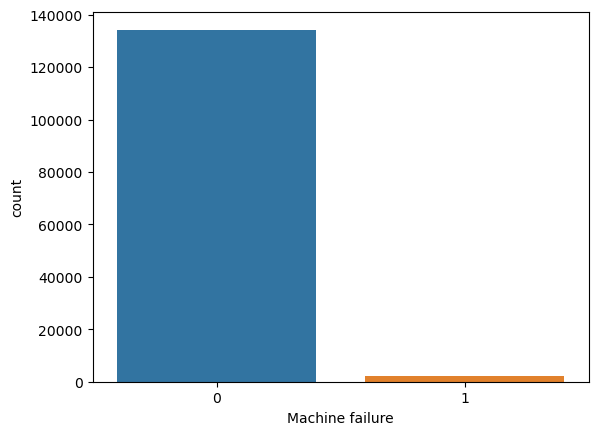

In [23]:
sns.countplot(x='Machine failure',data=df)

<font color='red'>Clearly we can see an imbalance in the data, We will have to tackle it later by either Undersampling or Over sampling, We are more likely to select undersampling.<br><font color='blue'>Lets take one step further by doing some 

## Multivariate analysis 

<font color='blue'>Lets start with the correlation matrix to see get an idea about how well the columns are in relation with target and also to spot if any columns introduce multicolinearity

<Axes: >

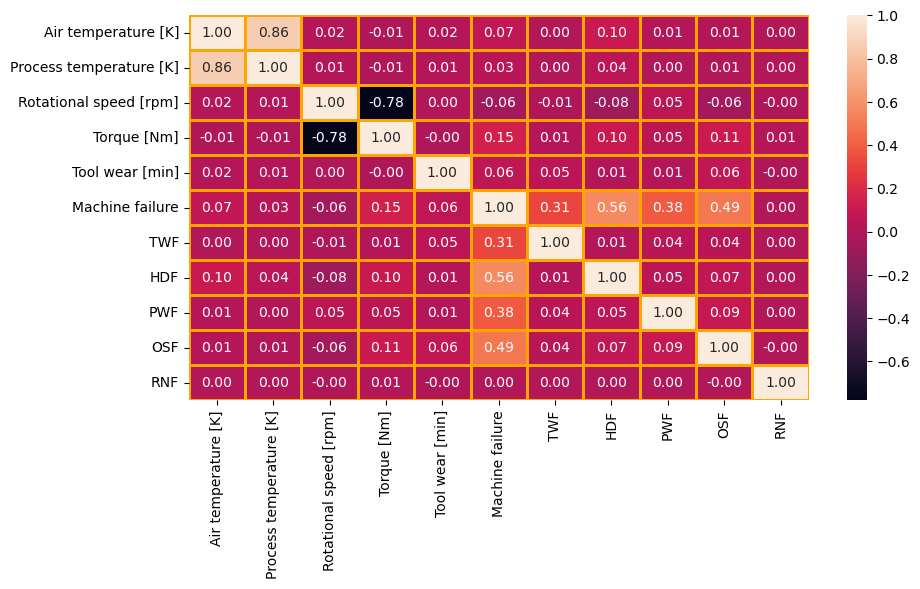

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.select_dtypes(['float64','int64']).corr(),annot=True,fmt='0.2f',linewidths=2,linecolor='orange')

<font color='red'>There it is , Air temperature and Process temperature they are both highly collinear to each other and thus shall introduce multicollinearity. Basically in simple words our model will not be able to understand that the influence in target is coming from which column.<br>Ideally we should drop the column which has least collinearity with the target column.<br>Similarly Rotational speed and Torgue have strong negative corelation.
<br><font color='blue'>We shall divide our columns into two list one for numerical and other for categorical which will make it easy to visualize it

In [25]:
numerical_columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
categorical_columns = ['Product ID', 'Type','TWF', 'HDF', 'PWF', 'OSF', 'RNF']

The skewness for Air temperature [K]is:  0.16117486841595963
The skewness for Process temperature [K]is:  0.057088237929182134
The skewness for Rotational speed [rpm]is:  1.8882503109110036
The skewness for Torque [Nm]is:  -0.028963391079620402
The skewness for Tool wear [min]is:  -0.027309909673089966


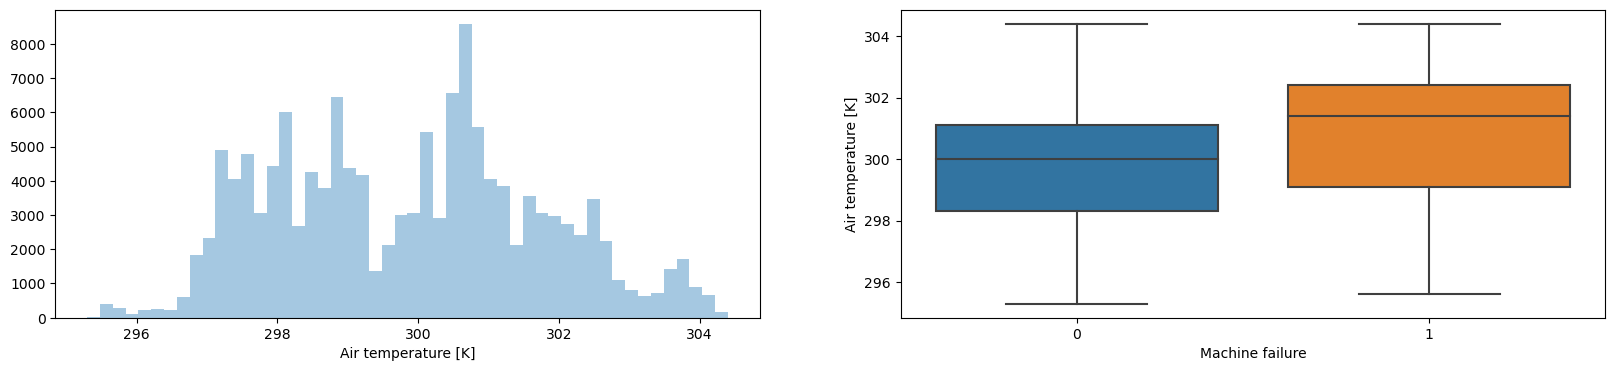

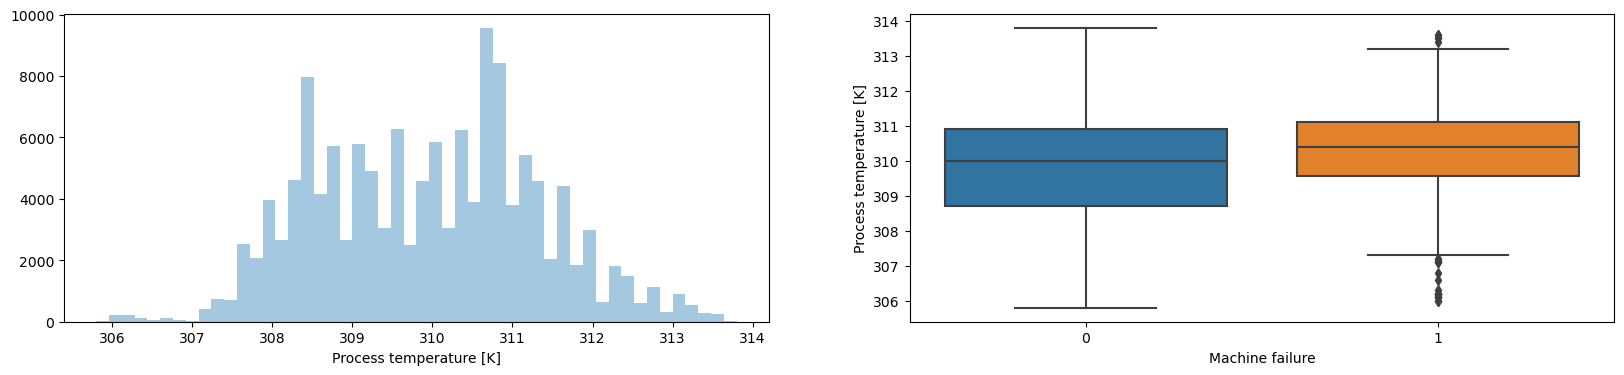

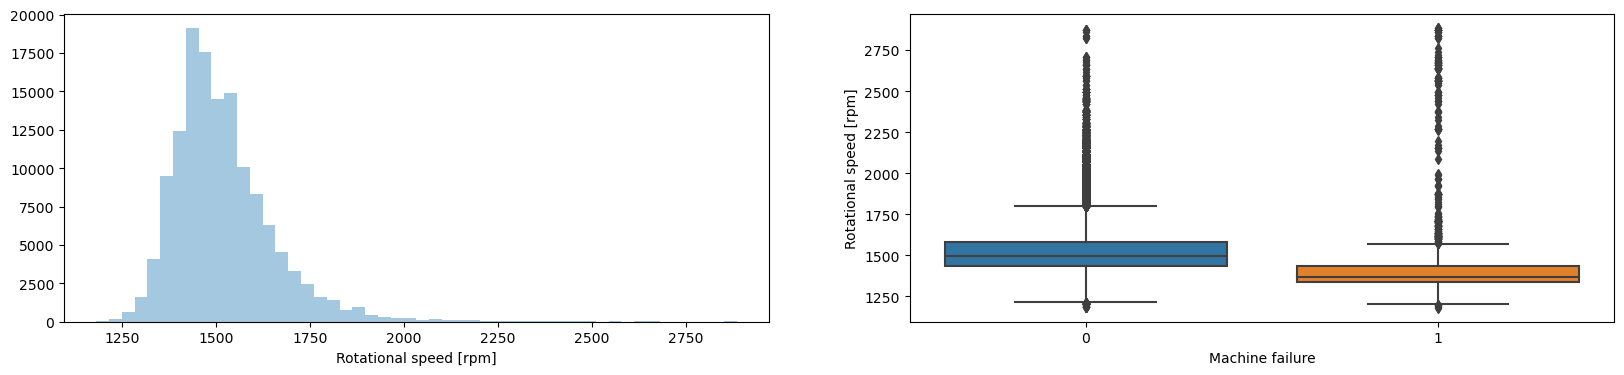

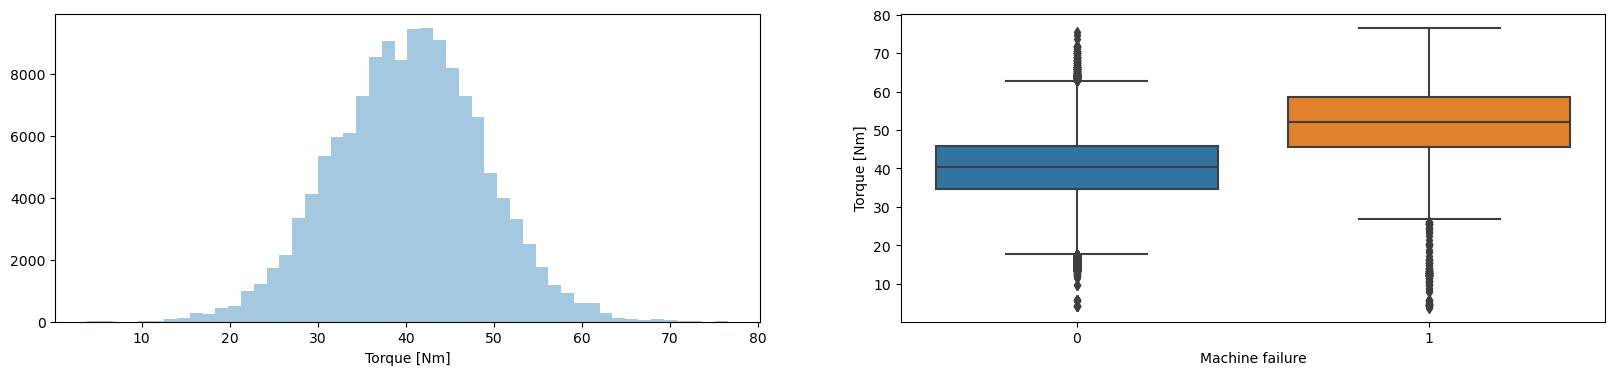

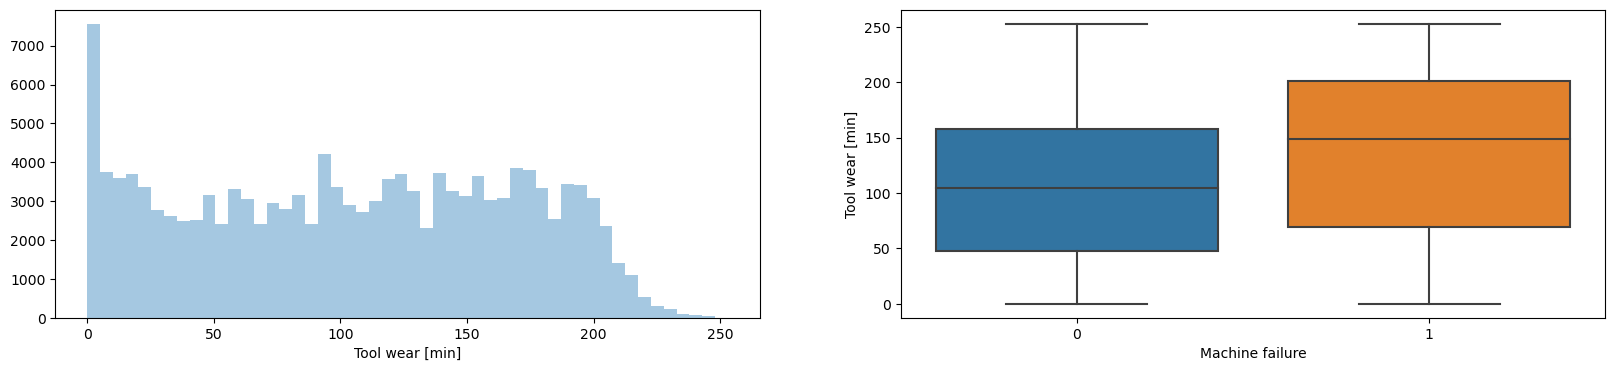

In [26]:
for i in numerical_columns:
    print('The skewness for '+i+'is: ',df[i].skew())
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.distplot(a=df[i],kde=False)
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Machine failure',y=i,data=df)

<font color='red'>Too many Outliers on Rotational Speed, will look to normalize it later.

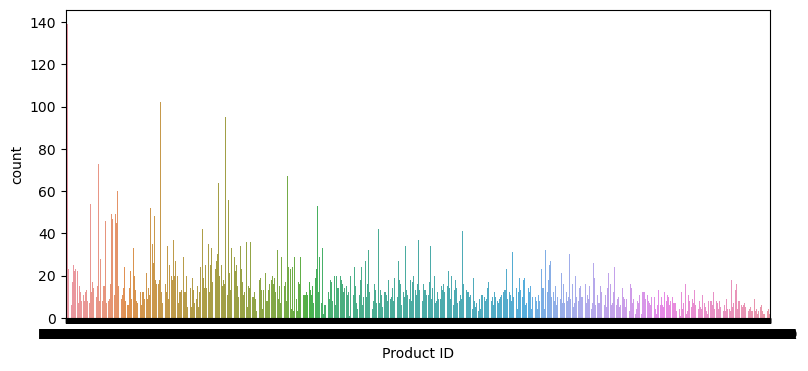

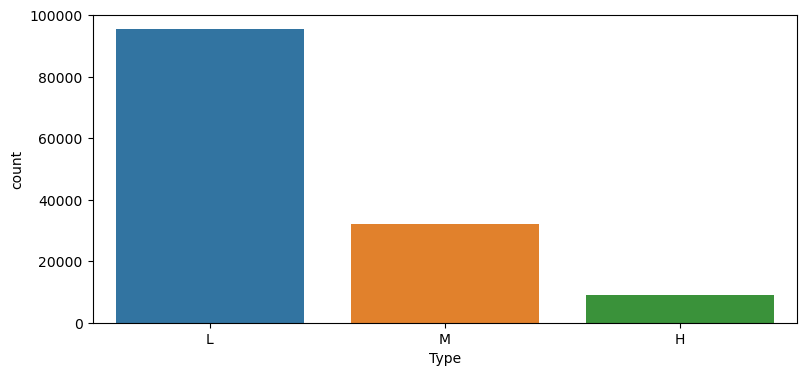

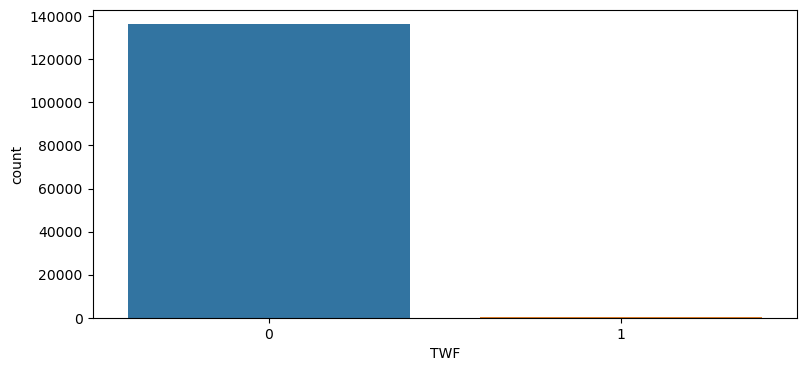

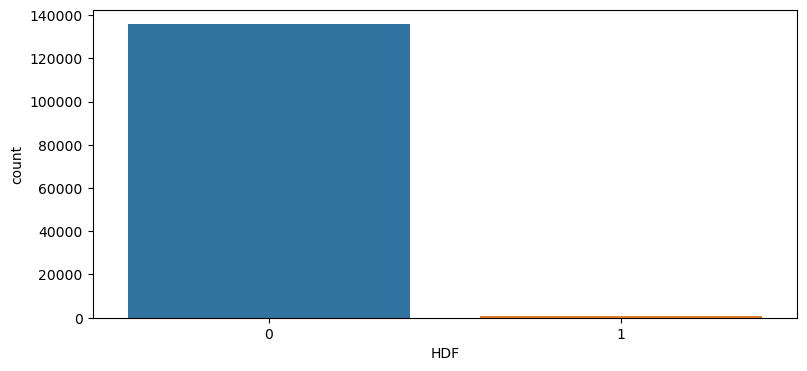

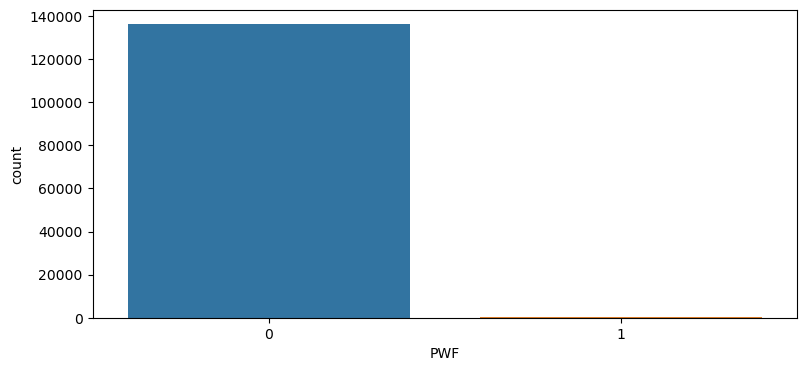

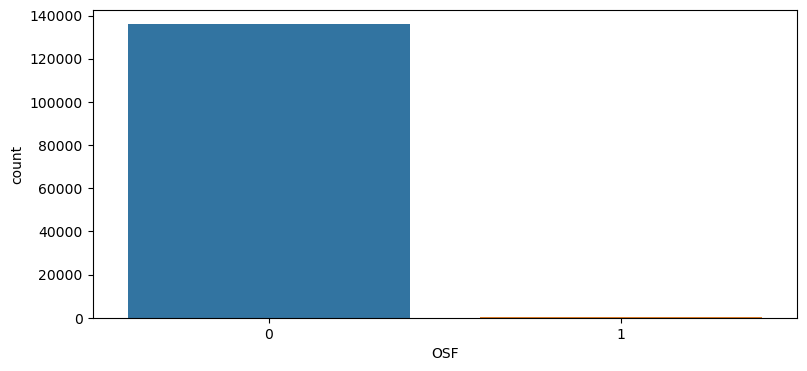

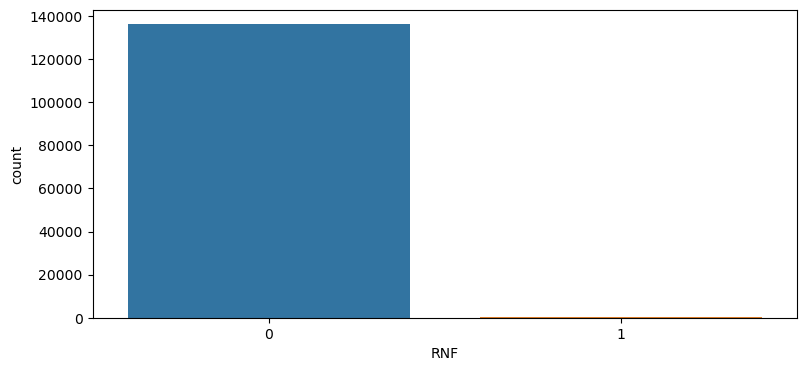

In [27]:
for i in categorical_columns:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.xlabel('Count')
    sns.countplot(x=i,data=df)
    

<font color='blue'>Lets see how many unique values are there in Product ID

In [28]:
df['Product ID'].nunique()

9976

In [29]:
df['Product ID'].value_counts()

L53257    139
L49056    131
L53271    131
L54275    120
L48892    120
         ... 
M24614      1
H39399      1
M15853      1
H32637      1
L48036      1
Name: Product ID, Length: 9976, dtype: int64

<font color='red'>As we can see there are multiple occurences of the same product , in laymen terms a faulty product is likely to have more records and is more likley to have a machine failure.<br>If two different machines have failed 5 times, the likelyhood of it failing again is the same , the likelyhood doesnt depend on the name of the machine.<br>Hence during data transformation we shall replace the column Product ID with Frequency of occurence for that product.

## Data preprocessing and cleaning

<font color='blue'>Let's Start with Checking for Null Values

In [30]:
df.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [31]:
df_test.isna().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<font color='red'>We can our data has no null values. Yayyy!<br><font color='blue'>Next Step that we will do is to replace Product ID with Frequency column.We will use simple map function to achieve it.

In [32]:
value_counts = df['Product ID'].value_counts()
frequency_map = value_counts.to_dict()
df['frequency_column'] = df['Product ID'].map(frequency_map)
df.drop('Product ID',axis=1,inplace=True)

In [33]:
value_counts_test = df_test['Product ID'].value_counts()
frequency_map_test = value_counts_test.to_dict()
df_test['frequency_column'] = df_test['Product ID'].map(frequency_map_test)
df_test.drop('Product ID',axis=1,inplace=True)

<font color='blue'>Using LabelEncoder we shall convert column 'Type' to Numbers.<br>Lets start by importing the library and creating its object and fitting the column to function

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
df['Type']=le.fit_transform(df['Type'])

In [36]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,frequency_column
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,25
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,20
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,33
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,29
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,8


In [37]:
df_test['Type']=le.fit_transform(df_test['Type'])

<font color='blue'>Next we will use Standard Scalar on Rotational speed [rpm] cuz the spread is too large compared to other features

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
df['Rotational speed [rpm]']=sc.fit_transform(df['Rotational speed [rpm]'].values.reshape(-1,1))

In [40]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,frequency_column
0,1,300.6,309.6,0.545416,36.1,140,0,0,0,0,0,0,25
1,2,302.6,312.1,1.720308,29.1,200,0,0,0,0,0,0,20
2,1,299.3,308.5,2.051873,26.5,25,0,0,0,0,0,0,33
3,1,301.0,310.9,0.026445,44.3,197,0,0,0,0,0,0,29
4,2,298.0,309.0,0.869773,35.4,34,0,0,0,0,0,0,8


In [41]:
df_test['Rotational speed [rpm]']=sc.fit_transform(df_test['Rotational speed [rpm]'].values.reshape(-1,1))

<font color='blue'>Last we saw both Air temperature [K]	and Process temperature [K]	were introducing mulitcolinearity hence we are going to remove one of them , we shall keep Air temperature cuz it has higher correlation to Machine failure

In [42]:
df.drop('Process temperature [K]',axis=1,inplace=True)
df_test.drop('Process temperature [K]',axis=1,inplace=True)

<font color='blue'>Our Next step will be to split the data into training data and testing data

In [43]:
y = df['Machine failure']
X = df.drop('Machine failure',axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=123)

<font color='red'>Mind it the dataset is still imbalanced we are just trying to see how our model performs and based on that we shall use resampled data later

## Building and evaluating machine learning models
<font color='blue'>Let's Start by building out model. Since the problem at hand is binary classification and we have less number of columns we will give our first attemp to solving with Logistic Regression<br>We will start by importing the necessary libraries for modelling and evaluation

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score,roc_auc_score

### Logistic Regression

In [46]:
log = LogisticRegression()

In [47]:
log.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred_log = log.predict(X_test)

In [49]:
log.score(X_test,y_test)

0.9948691636736788

In [50]:
confusion_matrix(y_test,y_pred_log)

array([[40281,     4],
       [  206,   438]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     40285
           1       0.99      0.68      0.81       644

    accuracy                           0.99     40929
   macro avg       0.99      0.84      0.90     40929
weighted avg       0.99      0.99      0.99     40929



<font color='red'>WEll Congrats 99% accuracy , but there lies a hidden problem.<br>Our model does a near perfect job in predicitng when a machine wont fail but not so well when a machine will fail and that is confirmed by the poor recall for target 1.<br><font color='blue'>Hence in such cases we are supposed to go with sampling techniques<br>We will start by importing the right libraries and resampling the data

### UnderSampling

In [52]:
from imblearn.under_sampling import NearMiss

In [53]:
nm = NearMiss()

In [54]:
X_resample,y_resample = nm.fit_resample(X,y)

In [55]:
print('Shape of original Data X',X.shape,'  Shape of Resampled Data X',X_resample.shape)
print('Value count of original Data y:\n',y.value_counts())
print('Value count of Resampled Data y:\n',y_resample.value_counts())

Shape of original Data X (136429, 11)   Shape of Resampled Data X (4296, 11)
Value count of original Data y:
 0    134281
1      2148
Name: Machine failure, dtype: int64
Value count of Resampled Data y:
 0    2148
1    2148
Name: Machine failure, dtype: int64


In [56]:
X_resample = X_resample.rename(columns={'Air temperature [K]':'Air temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'})

<font color='blue'>Now we shall split the resampled data again into train and test

In [57]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test = train_test_split(X_resample,y_resample,random_state=123,test_size=0.2)

<font color='blue'>Now we will use resampled data and check how well the model is doing

### Logistic with UnderSampling

In [58]:
log.fit(X_resampled_train,y_resampled_train)

LogisticRegression()

In [59]:
y_resampled_pred_log = log.predict(X_resampled_test)
y_resampled_pred_prob = log.predict_proba(X_resampled_test)
y_resampled_pred_prob_log_positive = y_resampled_pred_prob[:,1]


In [60]:
log.score(X_resampled_test,y_resampled_test)

0.8848837209302326

In [61]:
confusion_matrix(y_resampled_test,y_resampled_pred_log)

array([[425,   0],
       [ 99, 336]], dtype=int64)

In [62]:
print(classification_report(y_resampled_test,y_resampled_pred_log))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       425
           1       1.00      0.77      0.87       435

    accuracy                           0.88       860
   macro avg       0.91      0.89      0.88       860
weighted avg       0.91      0.88      0.88       860



In [63]:
roc_auc_score(y_resampled_test,y_resampled_pred_prob_log_positive)

0.8994455713319812

<font color='red'>Well as expected but not good enough, we can see an improve for target 1, but its not enough to be called a good model<br><font color='blue'>Next we shall try using SVC to determin if any non - linear relationships were missed out

### SVC

In [99]:
from sklearn.svm import SVC

In [100]:
svc = SVC(kernel = 'linear',probability=True)

In [101]:
svc.fit(X_resampled_train,y_resampled_train)

SVC(kernel='linear', probability=True)

In [102]:
y_resampled_pred_svc = svc.predict(X_resampled_test)
y_resampled_pred_svc_prob = svc.predict_proba(X_resampled_test)
y_resampled_pred_svc_prob_positive = y_resampled_pred_svc_prob[:,1]

In [103]:
svc.score(X_resampled_test,y_resampled_test)

0.8755813953488372

In [104]:
confusion_matrix(y_resampled_test,y_resampled_pred_svc)

array([[425,   0],
       [107, 328]], dtype=int64)

In [105]:
print(classification_report(y_resampled_test,y_resampled_pred_svc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       425
           1       1.00      0.75      0.86       435

    accuracy                           0.88       860
   macro avg       0.90      0.88      0.87       860
weighted avg       0.90      0.88      0.87       860



In [107]:
roc_auc_score(y_resampled_test,y_resampled_pred_svc_prob_positive)

0.9116159567275186

### XGBoost

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()

In [110]:
xgb.fit(X_resampled_train,y_resampled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
y_resampled_pred_xgb = xgb.predict(X_resampled_test)
y_resampled_pred_xgb_prob = xgb.predict_proba(X_resampled_test)
y_resampled_pred_xgb_prob_positive = y_resampled_pred_xgb_prob[:,1]

In [112]:
xgb.score(X_resampled_test,y_resampled_test)

0.9186046511627907

In [113]:
confusion_matrix(y_resampled_test,y_resampled_pred_xgb)

array([[403,  22],
       [ 48, 387]], dtype=int64)

In [114]:
print(classification_report(y_resampled_test,y_resampled_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       425
           1       0.95      0.89      0.92       435

    accuracy                           0.92       860
   macro avg       0.92      0.92      0.92       860
weighted avg       0.92      0.92      0.92       860



In [115]:
param = {'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
        'max_depth':[3,4,5,6,8,10,12,15],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.0,0.1,0.2,0.3,0.4],
        'n_estimators':[50,100]}

In [ ]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=xgb,
                  param_grid=param,
                  scoring='accuracy',
                  cv=10,n_jobs=-1)

In [ ]:
gsc.fit(X_resampled_train,y_resampled_train)

In [ ]:
gsc.best_params_

In [ ]:
gsc.best_score_

### CatBoostClassifier

In [80]:
from sklearn.metrics import roc_auc_score as AUC
from catboost import Pool,CatBoostClassifier

In [72]:
model = CatBoostClassifier() 

In [76]:
feature_names = ['Type',
                 'Air temperature',
                 'Rotational speed','Torque',
                 'Tool wear','TWF','HDF',
                 'PWF','OSF','RNF','frequency_column']

train_pool = Pool(X_resample.to_numpy(), y_resample.to_numpy(), 
                  feature_names=feature_names)

In [78]:
model.fit(train_pool, eval_set=train_pool, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [116]:
train_auc = AUC(y_resampled_test, model.predict(X_resampled_test))
print(f"Train Score: {train_auc}")

Train Score: 0.9827586206896552


In [117]:
confusion_matrix(y_resampled_test,model.predict(X_resampled_test))

array([[425,   0],
       [ 15, 420]], dtype=int64)

In [118]:
print(classification_report(y_resampled_test,model.predict(X_resampled_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       425
           1       1.00      0.97      0.98       435

    accuracy                           0.98       860
   macro avg       0.98      0.98      0.98       860
weighted avg       0.98      0.98      0.98       860



# Next all the changes are made in the test data to run it through the model and get our predictions

In [87]:
df_test = df_test.rename(columns={'Air temperature [K]':'Air temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'})

In [90]:
test_submission = {'id':test_id,'Machine failure':pred}

In [91]:
submission = pd.DataFrame(test_submission)

In [88]:
test_pool = Pool(df_test.to_numpy(), 
                 feature_names=feature_namestest_submission = {'id':test_id,'Machine failure':test_prob_positive}

submission = pd.DataFrame(test_submission))
pred = model.predict_proba(test_pool)[:, 1]
pred

array([0.56943023, 0.83735087, 0.24784839, ..., 0.98052075, 0.97780626,
       0.99032917])

In [86]:
df_test

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,frequency_column
0,1,302.3,-0.153806,38.0,60,0,0,0,0,0,18
1,1,301.7,1.375097,28.8,17,0,0,0,0,0,15
2,1,301.3,0.031949,37.7,96,0,0,0,0,0,7
3,2,300.1,-0.296694,47.6,5,0,0,0,0,0,7
4,2,303.4,-0.039496,41.3,114,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...
90949,1,302.3,-0.260972,40.4,15,0,0,0,0,0,7
90950,1,297.9,0.153403,33.8,31,0,0,0,0,0,29
90951,1,295.6,-0.139517,41.4,187,0,0,0,0,0,4
90952,1,298.1,0.096248,40.3,69,0,0,0,0,0,12


In [73]:
X_resample

,Type,Air temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,frequency_column
0,2,300.9,-1.285398,62.4,113,0,1,0,0,0,43
1,1,299.3,-1.890864,69.4,119,0,0,0,0,0,19
2,1,299.3,-1.890864,69.4,119,0,0,0,0,0,19
3,1,300.8,-1.307022,59.1,203,0,0,0,1,0,117
4,1,300.8,-1.307022,59.1,203,0,0,0,1,0,117
...,...,...,...,...,...,...,...,...,...,...,...
4291,1,302.6,0.848149,35.0,215,1,0,0,0,0,25
4292,1,297.3,0.235475,33.5,208,1,0,0,0,0,20
4293,1,299.1,-1.206111,49.7,74,0,0,0,0,0,38
4294,0,302.4,-1.689042,62.3,162,0,0,1,0,0,12


## Results and conclusion
<font color='blue'>Let's dive right into creating our submission file using the model we have created.<br>Already parallely i have transformed the test file, we will have a quick look and use predict function to get our answer<br>Some file manipulation will have to be done to get our final format.

In [119]:
test = pd.read_csv('test.csv')
test_id = test['id']

In [120]:
df_test

,Type,Air temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,frequency_column
0,1,302.3,-0.153806,38.0,60,0,0,0,0,0,18
1,1,301.7,1.375097,28.8,17,0,0,0,0,0,15
2,1,301.3,0.031949,37.7,96,0,0,0,0,0,7
3,2,300.1,-0.296694,47.6,5,0,0,0,0,0,7
4,2,303.4,-0.039496,41.3,114,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...
90949,1,302.3,-0.260972,40.4,15,0,0,0,0,0,7
90950,1,297.9,0.153403,33.8,31,0,0,0,0,0,29
90951,1,295.6,-0.139517,41.4,187,0,0,0,0,0,4
90952,1,298.1,0.096248,40.3,69,0,0,0,0,0,12


In [122]:
#SVC
test_pred_prob_svc = svc.predict_proba(df_test)
test_prob_positive_svc = test_pred_prob_svc[:,1]

In [124]:
test_submission_svc = {'id':test_id,'Machine failure':test_prob_positive_svc}

In [126]:
submission_svc = pd.DataFrame(test_submission_svc)

In [127]:
submission.to_csv('submission_svc.csv',index=False)

In [128]:
#xgb
test_pred_prob_xgb = xgb.predict_proba(df_test)
test_prob_positive_xgb = test_pred_prob_xgb[:,1]

test_submission_xgb = {'id':test_id,'Machine failure':test_prob_positive_xgb}

submission_xgb = pd.DataFrame(test_submission_xgb)

submission.to_csv('submission_xgb.csv',index=False)

In [130]:
#catboost
test_pred_prob_cb = model.predict_proba(df_test)
test_prob_positive_cb = test_pred_prob_cb[:,1]

test_submission_cb = {'id':test_id,'Machine failure':test_prob_positive_cb}

submission_cb = pd.DataFrame(test_submission_cb)

submission.to_csv('submission_cb.csv',index=False)

In [131]:
#log
test_pred_prob_log = log.predict_proba(df_test)
test_prob_positive_log = test_pred_prob_log[:,1]

test_submission_log = {'id':test_id,'Machine failure':test_prob_positive_log}

submission_log = pd.DataFrame(test_submission_log)

submission.to_csv('submission_log.csv',index=False)